#### Goal of this notebook is to perform EDA & clustering on the customer segmentation data to be able to learn the market basket analysis.

To know more about customer segmentation, please check this out: https://www.qualtrics.com/experience-management/brand/customer-segmentation/#:~:text=Customer%20segmentation%20is%20the%20process,of%20building%20a%20marketing%20persona.

The problem and dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [101]:
# -*- coding: utf-8 -*-

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [102]:
# Creating data frame and ingesting the data from .csv file into the data frame
df = pd.read_csv('C:/Users/rm634391/Analytics/Kaggle/CustomerSegmentation/Mall_Customers.csv')

###### Below steps are to understand the data

In [103]:
# Printing few rows of the data frame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,NaN,77
4,5,Female,31,17.0,40


In [104]:
# Printing the number of rows & number of columns in data frame
df.shape

(200, 5)

In [105]:
# Printing data types of each column
datatypes = df.dtypes
datatypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [106]:
# Printing the information about the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      199 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [107]:
# Counting total null values in the data frame
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64

In [108]:
# Counting null values in the data frame by rows
for i in range(len(df.index)) :
    print(" Total NaN in row", i + 1, ":",
          df.iloc[i].isnull().sum())

 Total NaN in row 1 : 0
 Total NaN in row 2 : 0
 Total NaN in row 3 : 0
 Total NaN in row 4 : 1
 Total NaN in row 5 : 0
 Total NaN in row 6 : 0
 Total NaN in row 7 : 0
 Total NaN in row 8 : 0
 Total NaN in row 9 : 0
 Total NaN in row 10 : 0
 Total NaN in row 11 : 0
 Total NaN in row 12 : 0
 Total NaN in row 13 : 0
 Total NaN in row 14 : 0
 Total NaN in row 15 : 0
 Total NaN in row 16 : 0
 Total NaN in row 17 : 0
 Total NaN in row 18 : 0
 Total NaN in row 19 : 0
 Total NaN in row 20 : 0
 Total NaN in row 21 : 0
 Total NaN in row 22 : 0
 Total NaN in row 23 : 0
 Total NaN in row 24 : 0
 Total NaN in row 25 : 0
 Total NaN in row 26 : 0
 Total NaN in row 27 : 0
 Total NaN in row 28 : 0
 Total NaN in row 29 : 0
 Total NaN in row 30 : 0
 Total NaN in row 31 : 0
 Total NaN in row 32 : 0
 Total NaN in row 33 : 0
 Total NaN in row 34 : 0
 Total NaN in row 35 : 0
 Total NaN in row 36 : 0
 Total NaN in row 37 : 0
 Total NaN in row 38 : 0
 Total NaN in row 39 : 0
 Total NaN in row 40 : 0
 Total Na

In [109]:
# Simple statistics of the data frame
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,199.000000,200.000000
mean,100.500000,38.850000,60.783920,50.200000
std,57.879185,13.969007,26.138878,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,42.000000,34.750000
50%,100.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###### Below steps are to convert data types

In [110]:
# Data type conversion (CustomerID is stored as integer, we can convert it into string)
df['Gender'] = df['Gender'].astype('str')
df['CustomerID'] = df['CustomerID'].astype('str')
dtype = df.dtypes
dtype

CustomerID                 object
Gender                     object
Age                         int64
Annual Income (k$)        float64
Spending Score (1-100)      int64
dtype: object

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    object 
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      199 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


##### Now onto some visualization

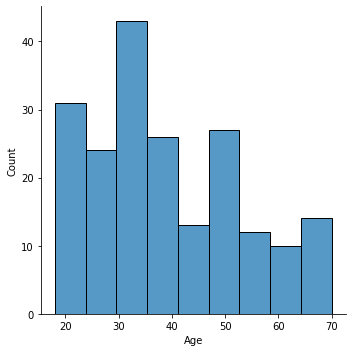

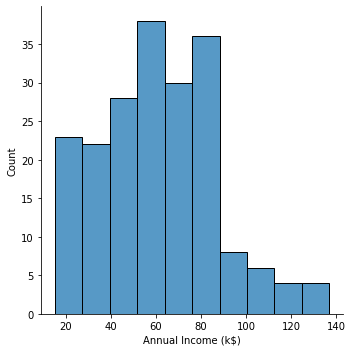

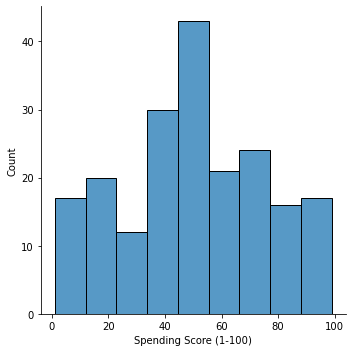

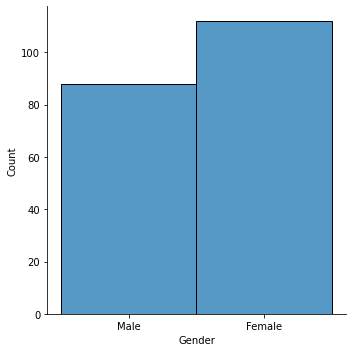

In [112]:
# Let us understand the distribution of each attributes (age, annual income & spending score)

# Distribution of age
sn.displot(data=df, x="Age", kind="hist", aspect=1)

# Distribution of Annual Income
sn.displot(data=df, x="Annual Income (k$)", kind="hist", aspect=1)


# Distribution of Spending Score
sn.displot(data=df, x="Spending Score (1-100)", kind="hist", aspect=1)

# Distribution of Gender
sn.displot(data=df, x="Gender", kind="hist", aspect=1)

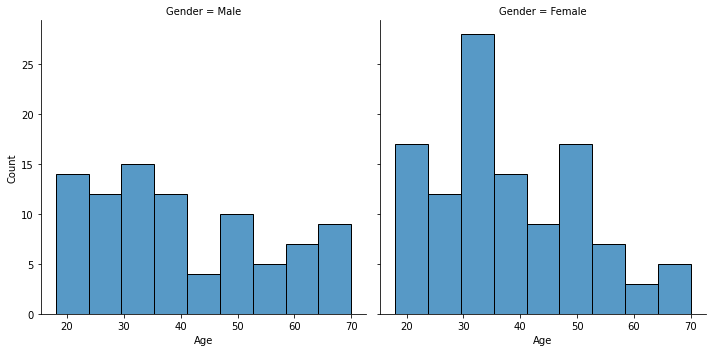

In [113]:
# Let us understand the distribution of each attributes (age) with another dimension Gender

# Distribution of age with column
sn.displot(data=df, x="Age", col="Gender", kind="hist", aspect=1)